In [1]:
#import Libraries
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import seaborn as sns
from sklearn.linear_model import LinearRegression
import math
import plotly.express as px

In [2]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Data extraction

In [3]:
dataset=pd.read_csv('C:\\Users\\USER\\Desktop\\STOCK\\udemy_courses.csv')

In [4]:
dataset.shape

(3678, 12)

In [5]:
dataset.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [6]:
dataset.head(4)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance


Visualiztions and words clouds

In [7]:
data=dataset.copy()
price=data.groupby('price')
price.describe().head()

course_id                                                             \
          count           mean            std      min       25%       50%   
price                                                                        
0         310.0  691446.970968  373678.504662  17349.0  363707.0  735673.0   
20        830.0  595121.893976  336644.776634   8324.0  321397.5  581823.0   
25        154.0  658742.058442  343748.740949  16689.0  386244.0  697975.0   
30        166.0  686486.554217  342450.511557  17922.0  406814.0  717434.0   
35        116.0  648187.551724  372975.410432  13216.0  295768.5  634415.0   

                            num_subscribers                ... num_lectures  \
             75%        max           count          mean  ...          75%   
price                                                      ...                
0      1024881.5  1268616.0           310.0  11533.951613  ...        25.00   
20      844513.5  1282064.0           830.0   1591.154217  ...        30.00   
25      952353.0  1253650.0           154.0   1109.487013  ...        34.00   
30      967855.5  1276020.0           166.0   1727.192771  ...        41.00   
35      967637.5  1270392.0           116.0   1002.586207  ...        36.25   

             content_duration                                                  \
         max            count      mean       std       min  25%   50%    75%   
price                                                                           
0      145.0            310.0  2.210753  2.573445  0.500000  1.0  1.50  2.500   
20     304.0            830.0  2.404016  3.278573  0.000000  1.0  1.50  2.875   
25     211.0            154.0  2.654221  2.688953  0.133333  1.0  1.75  3.500   
30     185.0            166.0  3.337149  2.995702  0.500000  1.5  2.25  4.000   
35     207.0            116.0  3.024138  4.831715  0.516667  1.0  1.50  3.000   

             
        max  
price        
0      21.0  
20     70.0  
25     20.5  
30     16.5  
35     31.5  

[5 rows x 40 columns]

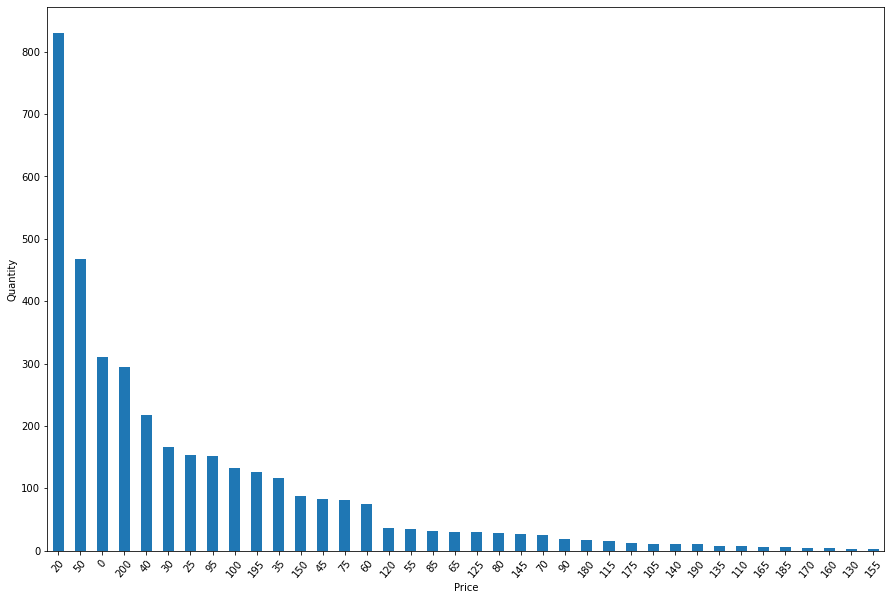

In [8]:
plt.figure(figsize=(15,10))
price.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.show()

In [9]:
ff = data.copy()
ff = ff.astype({'price':str,'num_subscribers':str})
ff.reset_index(drop=True, inplace=True)

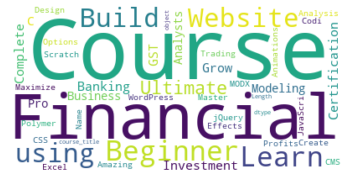

In [10]:
text = str(ff['course_title'])
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

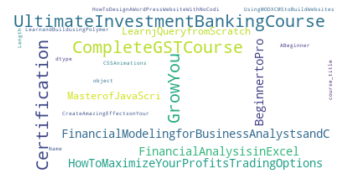

In [11]:

text = str(ff['course_title']).replace(" ","")
text = ''.join([i for i in text if not i.isdigit()])
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
text = str(ff['url'])
text = ''.join([i for i in text if not i.isdigit()])
wordcloud = WordCloud().generate(text)

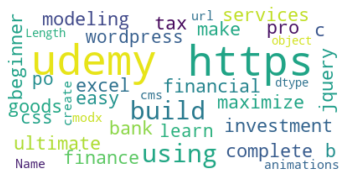

In [13]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [14]:
text = str(ff['url']).replace(" ","")
text = ''.join([i for i in text if not i.isdigit()])
wordcloud = WordCloud().generate(text)


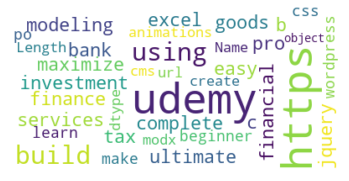

In [15]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


EDA

In [17]:
df=data.copy()

In [18]:
df['price'].unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135],
      dtype=int64)

In [19]:
df['price']=df['price'].replace(',','',regex=True)
df['price'].unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135],
      dtype=int64)

In [22]:
df=df.astype({'is_paid':int,'content_duration':int})

In [24]:
df.dtypes

course_id               int64
course_title           object
url                    object
is_paid                 int32
price                   int64
num_subscribers         int64
num_reviews             int64
num_lectures            int64
level                  object
content_duration        int32
published_timestamp    object
subject                object
dtype: object

In [27]:
scaled_df=df[['price','num_lectures','content_duration']]
scaled_df

,price,num_lectures,content_duration
0,200,51,1
1,75,274,39
2,45,51,2
3,95,36,3
4,200,26,2
...,...,...,...
3673,100,21,2
3674,25,42,3
3675,40,48,3
3676,50,38,3


Checking correlation between price,content duration,num_lectures


In [28]:
scaled_df.corr()

,price,num_lectures,content_duration
price,1.000000,0.330160,0.292803
num_lectures,0.330160,1.000000,0.800461
content_duration,0.292803,0.800461,1.000000


In [29]:
scaled_df['price'].unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135],
      dtype=int64)

In [30]:
scaled_df['num_lectures'].unique()

array([ 51, 274,  36,  26,  25,  23,  38,  15,  76,  17,  19,  16,  42,
        52,  12,  39,  40,  50,  81,  37,  41,  35,  80,  22,  28,  68,
        61, 138, 110, 174, 103,  79, 227,  43,  46,  62,  53,  77,  20,
        47,  33,  11, 102,  45,  32,  30,  18,  60,  54,  24, 134,   5,
        10,  49,  14,   6, 108,  57,   9,  13,   8, 462,  29,  59, 284,
        55,  34,  31, 544,  66,  21,  88,  44,  27,  48,  90,   7,  97,
       128,  63, 235, 211, 100,  82, 123, 332, 272,  69, 129, 316,  70,
       105, 176,  91,  64,  72,   4,  58, 142, 395, 194, 527,  74,  84,
        87,  65, 460, 101,  95, 107, 113,  71, 145,  75, 444,   0, 127,
        98, 286, 120, 130,  73, 121,  56, 158, 241,  86, 187, 111,  85,
       150,  96,  94, 119,  78, 122, 124, 163, 131,  67, 141, 118, 166,
       154, 185, 207, 225, 202, 115, 156,  83,  99, 196, 162,  89, 362,
       136, 310, 104, 291, 144, 161, 224, 240, 183, 192, 309, 215, 106,
       321, 151,  92, 126, 112,  93, 125, 348, 402, 135, 171, 21

In [31]:
scaled_df['content_duration'].unique()

array([ 1, 39,  2,  3,  5,  7,  4,  0,  6, 10, 11, 16,  9,  8, 62, 31, 20,
       46, 17, 12, 24, 19, 29, 26, 13, 18, 33, 71, 47, 14, 43, 45, 70, 21,
       68, 30, 15, 78, 34, 28, 23, 38, 32, 37, 25, 60, 22, 27, 44, 51, 57,
       76, 42, 48, 66])

consideration of the best course in udemycourse

In [32]:
scaled_df.describe()

,price,num_lectures,content_duration
count,3678.000000,3678.000000,3678.000000
mean,66.049483,40.108755,3.838227
std,61.005755,50.383346,6.058520
min,0.000000,0.000000,0.000000
25%,20.000000,15.000000,1.000000
50%,45.000000,25.000000,2.000000
75%,95.000000,45.750000,4.000000
max,200.000000,779.000000,78.000000


In [34]:
new_df=scaled_df[['price','num_lectures','content_duration']].round(1)

In [35]:
new_df.describe()

,price,num_lectures,content_duration
count,3678.000000,3678.000000,3678.000000
mean,66.049483,40.108755,3.838227
std,61.005755,50.383346,6.058520
min,0.000000,0.000000,0.000000
25%,20.000000,15.000000,1.000000
50%,45.000000,25.000000,2.000000
75%,95.000000,45.750000,4.000000
max,200.000000,779.000000,78.000000


In [36]:
new_df.sort_values(by=['price'],inplace=True,ascending=True)
new_df.sort_values(by=['num_lectures'],inplace=True,ascending=False)
new_df

,price,num_lectures,content_duration
2707,200,779,44
160,200,544,46
2748,200,536,25
561,190,527,71
3004,200,491,57
...,...,...,...
664,20,5,1
692,20,5,1
448,20,4,0
2377,35,4,0
